---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2021-2022
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Fechas de entrega:
- Grupo 2462: lunes 16 de mayo de 2022
- Grupo 2461: martes 17 de mayo de 2022

---

Última actualización: 31-03-2022 (enunciado)
                      09-05-2022 (resolución)

---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/).

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [1]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'Guillermo García Cobo', 'pareja': 'P06', 'grupo': '2402'},
               {'nombre': 'Álvaro Zaera de la Fuente', 'pareja': 'P06', 'grupo': '2402'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow 2.0 incluye oficialmente Keras.

In [2]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

### <font color="#CA3532"> Definición de seed</font>
Fijamos la seed para obtener resultados reproducibles en cada ejecución.

In [3]:
import random
SEED = 0
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

### <font color="#CA3532">Datos del problema</font>

El problema consiste en predecir si va a haber una erupción solar (*solar flares*) en ciertas regiones solares en función de las características de la región solar. El conjunto datos y la caracterización de sus atributos puede encontrarse en https://www.openml.org/d/40702. El siguiente fragmento de código permite cargar estos datos.

In [4]:
dataset_url = 'https://www.openml.org/data/get_csv/4965303/flare.arff' 

dataset = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
x_size = x.shape[1]
y = dataset[:,-1]

In [5]:
# Resultados de la división y el número de atributos

print('Ejemplo 0:', x[0], y[1])
print('Atributos:', x_size)
print('Clases:', np.unique(y))
print('Recuento de clases:', y.tolist().count(0), y.tolist().count(1))
print('Examplos:', len(x))

Ejemplo 0: [5. 4. 3. 1. 3. 1. 1. 2. 1. 1.] 0.0
Atributos: 10
Clases: [0. 1.]
Recuento de clases: 884 182
Examplos: 1066


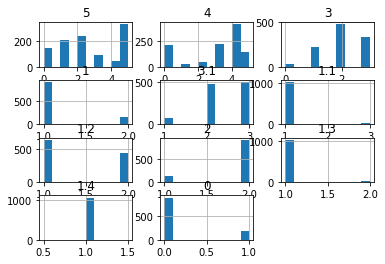

In [6]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(dataset_url, header=1)

# histograms of all variables 
df.hist()
pyplot.show()

La visualización de los histogramas no es la óptima. Sin embargo, se puede encontrar un estudio de los datos similar en la página web de la que se ha obtenido el dataset.
Lo primero que llama la atención es el desbalanceo entre el número de muestras de la clase a predecir, habiendo 884 de la clase 0 y únicamente 182 de la clase 1.
Esto será crucial a la hora de considerar cómo entrenar los datos.

En lo que respecta a los atributos de entrada, observamos que hay variables de entrada con comportamientos muy diferentes. Algunas muestran gran variabilidad entre distintos valores mientras que otras son prácticamente constantes. 

### <font color="#CA3532">Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [7]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------

# Decidimos no añadir más capas para este estudio inicial porque gran parte de los problemas no lineales se pueden resolver con una sola
# capa oculta y consideramos que no conviene empezar con un modelo excesivamente complejo

nn.add(Dense(x_size, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))


2022-04-27 19:42:09.260260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 19:42:09.352298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 19:42:09.353252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 19:42:09.354449: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. Aprende al menos el significado y las diferencias de las métricas *accuracy*, *precision*, *recall* y *AUC*. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

Hemos añadido el `f1-score` a las métricas, ya que nos permitirá evaluar el rendimiento del modelo teniendo en cuenta el desbalanceo de las clases.

Cabe mencionar que el `f1-score` es la media armónica de la `precision` y del `recall`, por lo que es una forma de tener en cuenta simultáneamente la tasa de aciertos en la clase positiva sobre los aciertos totales (`precision`) y la tasa de aciertos cuando se predice que una muestra es positiva (`recall`). En la siguiente imagen vemos un resumen de ambas métricas:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png)

Por ello, el `f1-score` nos da información sobre el rendimiento en la clase positiva relativo al rendimiento general y a la proporción de predicciones positivas. Gracias a esto, es una métrica sensible al desbalanceo de clases.

Por otro lado, como hemos mencionado, esta métrica evalúa el rendimiento específico de la clase positiva. En nuestro caso, consideramos que esto es lo deseado al ser un problema de clasificación binaria dónde queremos que el modelo tenga el mejor rendimiento posible prediciendo cuándo va a suceder una erupción solar (que además es la clase menos representada). Si el problema fuera multiclase, podríamos (y deberíamos) combinar los `f1-score`'s correspondientes a través de medias simples (*macro*) o ponderadas (*weighted*).

In [8]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='Prec'),
            keras.metrics.Recall(name='Rec'),
            keras.metrics.AUC(name='AUC'),
            keras.metrics.AUC(name='PRC', curve='PR'),
            tfa.metrics.F1Score(num_classes=1, threshold=0.5, name='f1_score')  # f1-score no está disponible en keras
          ]

# Utilizamos como función de pérdidas la de entropía cruzada, función habitual para los problemas de clasificación
# También optamos por usar Adam como optimizador en lugar de SGD para estos experimentos iniciales debido a que Adam suele converger más rápidamente a la hora de entrenar
nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

nn.build((None, x_size))
initial_weights = nn.get_weights() # Nos guardamos los pesos iniciales para usar los mismos en todos los experimentos

Como muestra la última línea de código de la celda anterior, nos guardamos los pesos iniciales. Estos son generados al crear el modelo, y si no se resetean explícitamente, sucesivas llamadas a `fit` partirán de los pesos entrenados por la llamada anterior (véase este [enlace](https://stackoverflow.com/questions/48599464/does-calling-the-model-fit-method-again-reinitialize-the-already-trained-weights)). Esto haría que los experimentos fueran cada vez mejores (al menos en entrenamiento) sin que eso signifique una mejora real.

### <font color="#CA3532">Conjuntos de entrenamiento y validación</font>

Usaremos el 80 % de los datos para entrenamiento y el 20 % para validación. Usaremos también la técnica de muestreo estratificado (también están permitidas otras formas de validación).

Al estratificar por `y`, aseguramos que la distribución de la muestra de entrenamiento y de validación contengan una proporción de clases similar a la original.
De esta manera, se evita que el desbalanceo de los datos provoque que gran parte de las muestras de la clase minoritaria de `y` acaben en uno de los dos conjuntos (entrenamiento y validación).
Si esto sucediese, el entrenamiento podría dejar de ser efectivo. Por ello, es importante realizar la estratificación.

In [9]:
# Contrucción de los conjuntos de entrenamiento y validación

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2, random_state=SEED)  # Fijamos la seed

### <font color="#CA3532">Visualización de resultados</font>

Para la visualización de los resultados utilizaremos gráficas con la evolución de la función de pérdida y las métricas en cada época del entrenamiento, tanto para los datos de entrenamiento como para los de validación.

También obtendremos la matriz de confusión y alguna métricas sobre cada clase del problema. Observaremos especialmente la medida macro-F1.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()

### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

https://keras.io/api/models/model_training_apis/#fit-method

2022-04-27 19:42:13.547394: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________





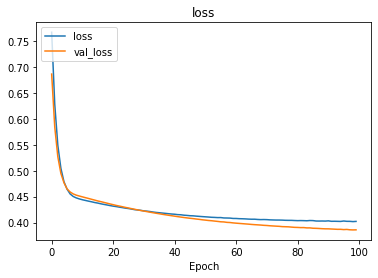

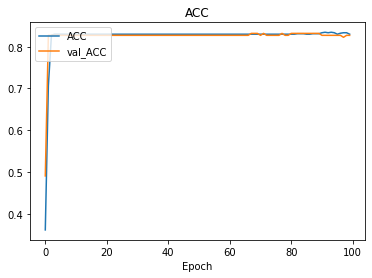

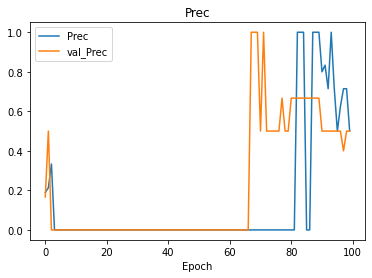

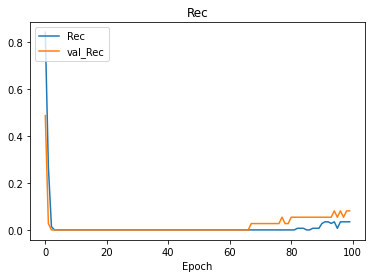

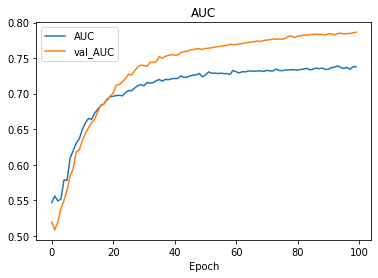

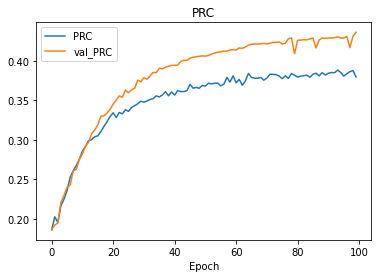

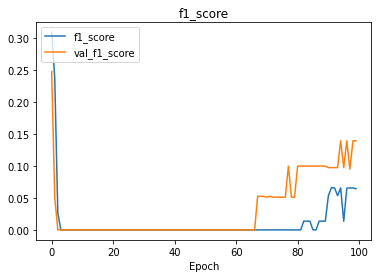

[[174   3]
 [ 34   3]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       177
         1.0       0.50      0.08      0.14        37

    accuracy                           0.83       214
   macro avg       0.67      0.53      0.52       214
weighted avg       0.78      0.83      0.77       214



In [11]:
# Entrenamiento

epochs = 100

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Predicciones del conjunto de evaluación

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

# Detalles de la red neuronal

nn.summary()
print('\n\n')

# Visualización de las métricas 

show_metrics(history)

# Matriz de confusión

print(confusion_matrix(y_val, y_pred))

# Observa la medida macro-f1 del siguiente informe

print(classification_report(y_val, y_pred, zero_division=0))


### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>
Como podrás haber observado en problema no está balanceado (o está bastante desequilibrado), porque el número de ejemplos de cada clase es muy diferente.

Existen varias técnicas para abortar este tipo de problemas. Una de ellas consiste seleccionar un subconjunto de datos equilibrados en el que las dos clases esten representadas en la misma proporción.


In [12]:
### -------------------------------------------------------------------------------
### Asigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

n_clase_1 = np.count_nonzero(y == 1)
train_index_clase_0 = (y_train == 0).nonzero()[0]
val_index_clase_0 = (y_val == 0).nonzero()[0]

# Obtenemos los índices de la clase 0 a eliminar en entrenamiento y validación
# Para ello, dado que queremos quedarnos con N_CLASE_1 elementos, seleccionamos tantos índices como TOTAL - N_CLASE_1;
# teniendo en cuenta que el 80% está en entrenamiento y el 20% en validación
train_index_to_remove = np.random.choice(train_index_clase_0, np.count_nonzero(y_train == 0) - int(n_clase_1*0.8), replace=False)
val_index_to_remove = np.random.choice(val_index_clase_0, np.count_nonzero(y_val == 0) - int(n_clase_1*0.2), replace=False)

x_train_balanceado = np.delete(x_train, train_index_to_remove, axis=0)
y_train_balanceado = np.delete(y_train, train_index_to_remove)

x_val_balanceado = np.delete(x_val, val_index_to_remove, axis=0)
y_val_balanceado = np.delete(y_val, val_index_to_remove)

Vuelve a entrenar con este nuevo conjunto de datos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [13]:
nn.set_weights(initial_weights) # Reseteamos los pesos para no empezar el entrenamiento con pesos ya previamente entrenados
history = nn.fit(x_train_balanceado, y_train_balanceado, epochs=epochs, verbose=0, validation_data=(x_val_balanceado, y_val_balanceado))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val_balanceado)
y_pred = y_pred > 0.5

print(classification_report(y_val_balanceado, y_pred, zero_division=0))

print(confusion_matrix(y_val_balanceado, y_pred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72        36
         1.0       0.72      0.78      0.75        37

    accuracy                           0.74        73
   macro avg       0.74      0.74      0.74        73
weighted avg       0.74      0.74      0.74        73

[[25 11]
 [ 8 29]]


Observamos como el rendimiento entre clases es mucho más estable que antes. Sin embargo, estamos desperdiciando muchos datos útiles de la clase 0

Otra técnica consiste en asignar un peso a cada clase para que lo tenga en cuenta en algoritmo de entrenamiento.
Aprende lo que hace el parámetro ```class_weight``` de ```fit``` (https://keras.io/api/models/model_training_apis/#fit-method) y explícalo.

Para no desperdiciar los datos de la clase sobrerrepresentada, `Keras` nos permite proporcionar unos pesos que serán aplicados en la función de pérdidas. Gracias a esto, la función de pérdidas consisitirá en una media ponderada de la pérdida en cada clase, por lo que podremos sobreponderar la clase infrarrepresentada, equilibrando la importancia que el modelo da a cada clase.

In [14]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}

print(class_weights)

{0: 0.6025459688826026, 1: 2.9379310344827587}


Vuelve a entrenar considerando distintos pesos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [15]:
nn.set_weights(initial_weights) # Reseteamos los pesos para no empezar el entrenamiento con pesos ya previamente entrenados
history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       177
         1.0       0.37      0.81      0.50        37

    accuracy                           0.72       214
   macro avg       0.66      0.76      0.66       214
weighted avg       0.85      0.72      0.76       214

[[125  52]
 [  7  30]]


Los resultados vuelven a ser superiores. Con respecto a limitar el número de muestras, parece que los resultados son mejores en el primer caso. Sin embargo, consideramos que no se deben apartar en ningún caso datos de entrenamiento, ya que esto prepará al modelo frente a datos desconocidos. Parece entonces que la ponderación de la función de pérdidas es la mejor opción.

### <font color="#CA3532">Comprobación de la efectividad de la normalización de datos</font>

A continuación vamos a comprobar si la normalización de los datos de entrada afecta de alguna manera al rendimiento final del modelo

In [16]:
# Normalización de los datos (utilizando únicamente la información de entrenamiento para normalizar)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)

Es importante tener en cuenta que la normalización de los datos de validación debe ser considerando únicamente la información de los datos de entrenamiento.
Esto es lógico porque la validación sirve para comprobar si el modelo funciona correctamente con datos nuevos y el modelo y el preprocesado no debe depender de esos datos.
Idealmente, esto no debería suponer un problema ya que los datos de entrenamiento deberían ser una muestra representativa de la población en lo referente a su distribución.

In [17]:
nn.set_weights(initial_weights) # Reseteamos los pesos para no empezar el entrenamiento con pesos ya previamente entrenados
history = nn.fit(x_train_norm, y_train, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val_norm, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val_norm)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       177
         1.0       0.37      0.81      0.50        37

    accuracy                           0.72       214
   macro avg       0.66      0.76      0.66       214
weighted avg       0.85      0.72      0.76       214

[[125  52]
 [  7  30]]


Como los resultados son iguales, concluimos que la normalización no es necesaria.

### <font color="#CA3532">Optimización del diseño de la red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

- Utilizad ```tuner``` para la búsqueda de estos hiperparámetros (https://keras.io/keras_tuner/).


In [18]:
!pip install -U keras-tuner
from keras_tuner.tuners import RandomSearch
import keras_tuner

     |████████████████████████████████| 133 kB 931 kB/s            
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.1.0
    Uninstalling keras-tuner-1.1.0:
      Successfully uninstalled keras-tuner-1.1.0


Hasta ahora, hemos fijado un modelo de red neuronal que se ha utilizado para realizar experimentos iniciales que nos han servido para conocer en mayor profundidad el problema.
Gracias a ellos, hemos tomado decisiones acerca de qué preprocesamiento realizar a los datos (en relación al desbalanceo de clases y al hecho de que no es necesario normalizar).

Nuestro objetivo ahora es el de obtener el mejor modelo de red neuronal posible. 
Para ello, en la siguiente celda se utiliza ```tuner``` con el objetivo de probar diferentes hiperparámetros y así obtener una red neuronal lo más óptima posible.
El funcionamiento consiste en probar de manera aleatoria distintas combinaciones de hiperparámetros indicados previamente.
Concretamente, modificamos los siguientes hiperparámetros:

- Número de capas ocultas: entre 1 y 2. Generalmente, con 1 capa oculta es suficiente para resolver problemas no lineales. Sin embargo, puede ser que un modelo con dos capas ocultas funcione mejor a la hora de tratar con problemas más complejos. Por ello, decidimos probar ambas posibilidades.
- Número de neuronas de cada una de las capas ocultas: entre 5 y 20 neuronas (escogiendo como posibilidades únicamente los múltiplos de 5). Esto permite probar capas con mayor y menos complejidad.
- Función de activación de cada una de las capas ocultas: probamos la relu, tangente hiperbólica y la sigmoide. Las tres funciones se utilizan habitualmente y tienen propiedades distintas (sobre todo la relu comparada con las otras dos).
- Tasa de aprendizaje: entre 0.0001 y 0.01. Es un valor crucial a la hora de realizar el aprendizaje. Uno excesivamente pequeño puede provocar que el aprendizaje sea excesivamente lento y uno excesivamente grande puede provocar que directamente no haya aprendizaje. En nuestra experiencia, la tasa de aprendizaje óptima suele estar entre los valores uqe hemos fijado como límite.
- Optimizador: probamos Adam, SGD y RMSProp. Los tres son optimizadores basados en el descenso por gradiente. SGD define el proceso de optimización más básico. Los otros dos añaden a la retropropagación habitual un ajuste automático dependiendo del histórico del proceso de entrenamiento. Cada uno proporciona mejores resultados en distintas situaciones.

Cabe destacar que se ha dejado completamente fija la definición de la capa de salida. Por ser un problema de clasificación con una clase, debe tener una única neurona con función de activación sigmoide.
Lo único que se ha fijado previamente además de eso es la función de pérdidas, que como se ha mencionado anteriormente es la que se usa para problemas de clasificación.

Para la realización de las pruebas, hemos fijado que se realicen 300 experimentos distintos seleccionando los hiperparámetros de manera aleatoria entre los mencionados.
Es necesario realizar un número de pruebas elevado para poder probar un número de combinaciones significativo antes de escoger un modelo óptimo.

In [19]:
### -------------------------------------------------------
### Define tu hipermodelo
### -------------------------------------------------------

def build_model(hp):
    nn = Sequential()
    for i in range(hp.Int('hidden_layers', min_value=1, max_value=2, step=1)):
        nn.add(Dense(hp.Int(f'units_{i}', min_value=5, max_value=20, step=5), activation=hp.Choice(f'activation_{i}', ["relu", "sigmoid", "tanh"])))
    nn.add(Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer_name = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    optimizer_dict = {'adam': keras.optimizers.Adam(learning_rate=learning_rate), 'sgd': keras.optimizers.SGD(learning_rate=learning_rate), 
                      'rmsprop': keras.optimizers.RMSprop(learning_rate=learning_rate)}
    nn.compile(optimizer=optimizer_dict[optimizer_name], loss="binary_crossentropy", metrics=metrics)
    return nn

### -------------------------------------------------------
### Pon en marcha la búsqueda de hiperparámetros, elije el 
### objetivo más adecuado.
### -------------------------------------------------------

tuner = RandomSearch(build_model, objective=keras_tuner.Objective('val_f1_score', direction="max"), max_trials=300, executions_per_trial=2) 

tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=epochs, class_weight=class_weights, validation_data=(x_val, y_val), verbose=0)

tuner.results_summary()

best_nn = tuner.get_best_models(num_models=1) # Nos guardamos el mejor modelo en una variable

y_pred = best_nn[0].predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

Search space summary
Default search space size: 5
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 20, 'step': 5, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}
Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
hidden_layers: 1
units_0: 10
activation_0: relu
lr: 0.003548788601453319
optimizer: adam
units_1: 15
activation_1: sigmoid
Score: 0.5730188488960266
Trial summary
Hyperparameters:
hidden_layers: 1
units_0: 15
activation_0: tanh
lr: 0.006991661056032743
optimizer: adam


### <font color="#CA3532">Diseño final de la red neuronal</font>
Define ahora tu modelo final y muestra los resultados de su evaluación.

Como resultado del apartado anterior nos hemos guardado el modelo que mejor ```f1-score``` ha proporcionado (hemos visto que es la métrica más adecuada para comparar modelos en este tipo de problema).
Concretamente, la arquitectura definida por ese modelo es la siguiente.

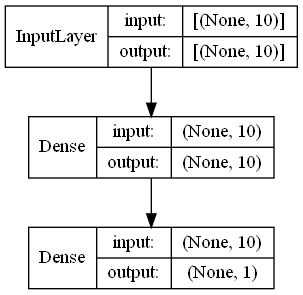

In [20]:
nn_final = best_nn[0]
tf.keras.utils.plot_model(nn_final, show_shapes=True, show_layer_names=False)

Se puede observar que el modelo tiene solo una capa oculta de 10 neuronas, exactamente igual que el número de atributos de entrada de la capa inicial.
Esto coincide con la arquitectura inicial que utilizamos para realizar los primeros experimentos.
La diferencia entre este modelo y ese inicial radica en la función de activación de la capa oculta (donde se utiliza la relu en lugar de la sigmoide) 
y la tasa de aprendizaje del optimizador, donde ya no se usa la que se asigna por defecto en Adam y se utiliza 0.003548788601453319 en su lugar.

El cambio de la función de activación y la tasa de aprendizaje pueden resultar pequeños cambios teniendo en cuenta que el resto de los aspectos de la arquitectura son iguales a los del modelo inicial.
Sin embargo, el cambio en el rendimiento al comparar el valor de ```f1-score``` es significativo al hacer estos cambios. 
Esto muestra lo crucial que es hacer experimentos modificando los hiperparámetros.

Por último, nos preguntamos si entrenando el modelo final que hemos obtenido un mayor número de épocas, obtendremos mejores resultados.

In [21]:
### ---------------------------------------------------------------------------
### Modelo final y evaluación
### ---------------------------------------------------------------------------

# Entrenamos el modelo desde los pesos que mejor resultado han dado, doblando entonces el número de épocas de este mejor modelo
history = nn_final.fit(x_train, y_train, epochs=epochs, class_weight=class_weights, validation_data=(x_val, y_val), verbose=0)

y_pred = nn_final.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

[[124  53]
 [  7  30]]
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81       177
         1.0       0.36      0.81      0.50        37

    accuracy                           0.72       214
   macro avg       0.65      0.76      0.65       214
weighted avg       0.85      0.72      0.75       214



Sin embargo, observamos que el valor de ```f1-score``` disminuye al realizar este entrenamiento extra debido, seguramente, a un excesivo sobreajuste.
Por tanto, nuestro mejor modelo viene dado por la arquitectura mostrada, entrenando con el número de épocas fijado al inicio.
Su matriz de confusión y resultados con diferentes métricas se puede encontrar al final del apartado anterior. 

### <font color="#CA3532">Anexo: XGBoost</font>
Con el fin de comparar el comportamiento de la red neuronal obtenida con otro tipo de modelos, decidimos entrenar un `XGBClassifier`. Para usar la máxima potencia del hardware del que disponemos gracias a Google Collab, usamos la opción de GPU que permite la librería. Esta opción ha sido un gran descubrimiento, ya que la mejora en tiempos es espectacular

In [22]:
! pip install xgboost
import xgboost as xgb
import sklearn

Para tener en cuenta el desbalanceo de clases, la [documentación](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html#handle-imbalanced-dataset) sugiere usar el parámetro `scale_pos_weight`, que se estima como el cociente del número de elementos de la clase negativa sobre el número de elementos de la clase positiva.

In [23]:
scale_pos_weight_estimation = y_train.tolist().count(0) / y_train.tolist().count(1)

Tras probar diversas combinaciones de hiperparámetros, una de las mejores es la siguiente

In [24]:
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', eval_metric=sklearn.metrics.f1_score, scale_pos_weight=scale_pos_weight_estimation, 
                            n_estimators=25, max_depth=2, learning_rate=0.005,
                            gpu_id=0, tree_method='gpu_hist', predictor='gpu_predictor',
                            n_jobs=-1, use_label_encoder=False, verbosity=0, random_state=SEED)
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric=<function f1_score at 0x7ff1b5859ef0>, gamma=0,
              gpu_id=0, importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=4.875862068965517, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [25]:
y_pred = xgb_cls.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

[[146  31]
 [ 12  25]]
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       177
         1.0       0.45      0.68      0.54        37

    accuracy                           0.80       214
   macro avg       0.69      0.75      0.70       214
weighted avg       0.84      0.80      0.81       214



Observamos que el `f1-score` obtenido es similar (incluso inferior) al de la red neuronal entrenada. Concluimos que la red neuronal llega a unos buenos resultados

Finalmente, realizamos una búsqueda en grid para ver si podemos exprimir el rendimiento del `XGBClassifier`

In [26]:
from sklearn.model_selection import GridSearchCV

cv_params = {'max_depth': [1,2,3,5], 'n_estimators': [25, 50, 100, 250, 500, 1000], 'learning_rate': [0.3, 0.03, 0.003, 0.0003], 'max_delta_step': [0,1,2,4], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'objective': 'binary:logistic', 'eval_metric': sklearn.metrics.f1_score, 'scale_pos_weight': scale_pos_weight_estimation,
              'gpu_id': 0, 'tree_method': 'gpu_hist',
              'n_jobs': -1, 'use_label_encoder': False, 'verbosity': 0, 'random_state': SEED}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring='f1', cv=3, verbose=0)

In [27]:
csv.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric=<function f1_score at 0x7ff1b5859ef0>,
                                     gamma=None, gpu_id=0, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None,
                                     scale_pos_weight=4.875862068965517,
                                     subsample=None, tree_method='gpu_hist',
         

In [28]:
csv.best_score_

0.45183545882017667

In [29]:
csv.best_params_

{'learning_rate': 0.03,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 25}

Entrenamos el clasificador con los mejores hiperparámetros obtenidos y comprobamos su rendimiento en validación

In [30]:
fix_params.update(csv.best_params_)
best_xgb = xgb.XGBClassifier(**fix_params)
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric=<function f1_score at 0x7ff1b5859ef0>, gamma=0,
              gpu_id=0, importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4.875862068965517, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [31]:
y_pred = xgb_cls.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

[[146  31]
 [ 12  25]]
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       177
         1.0       0.45      0.68      0.54        37

    accuracy                           0.80       214
   macro avg       0.69      0.75      0.70       214
weighted avg       0.84      0.80      0.81       214



Los resultados obtenidos tras hacer búsqueda en grid son idénticos a los obtenidos previamente.
Esto nos lleva a concluir (con un sustento de resultados mayor) que nuestro modelo de red neuronal definido clasifica considerablemente bien los datos. 